In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.stats
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 13}

plt.rc('font', **font)




(0.9997135017134111, 5.877772498549109e-11) (0.9991605134067286, 1.478113639544523e-09)


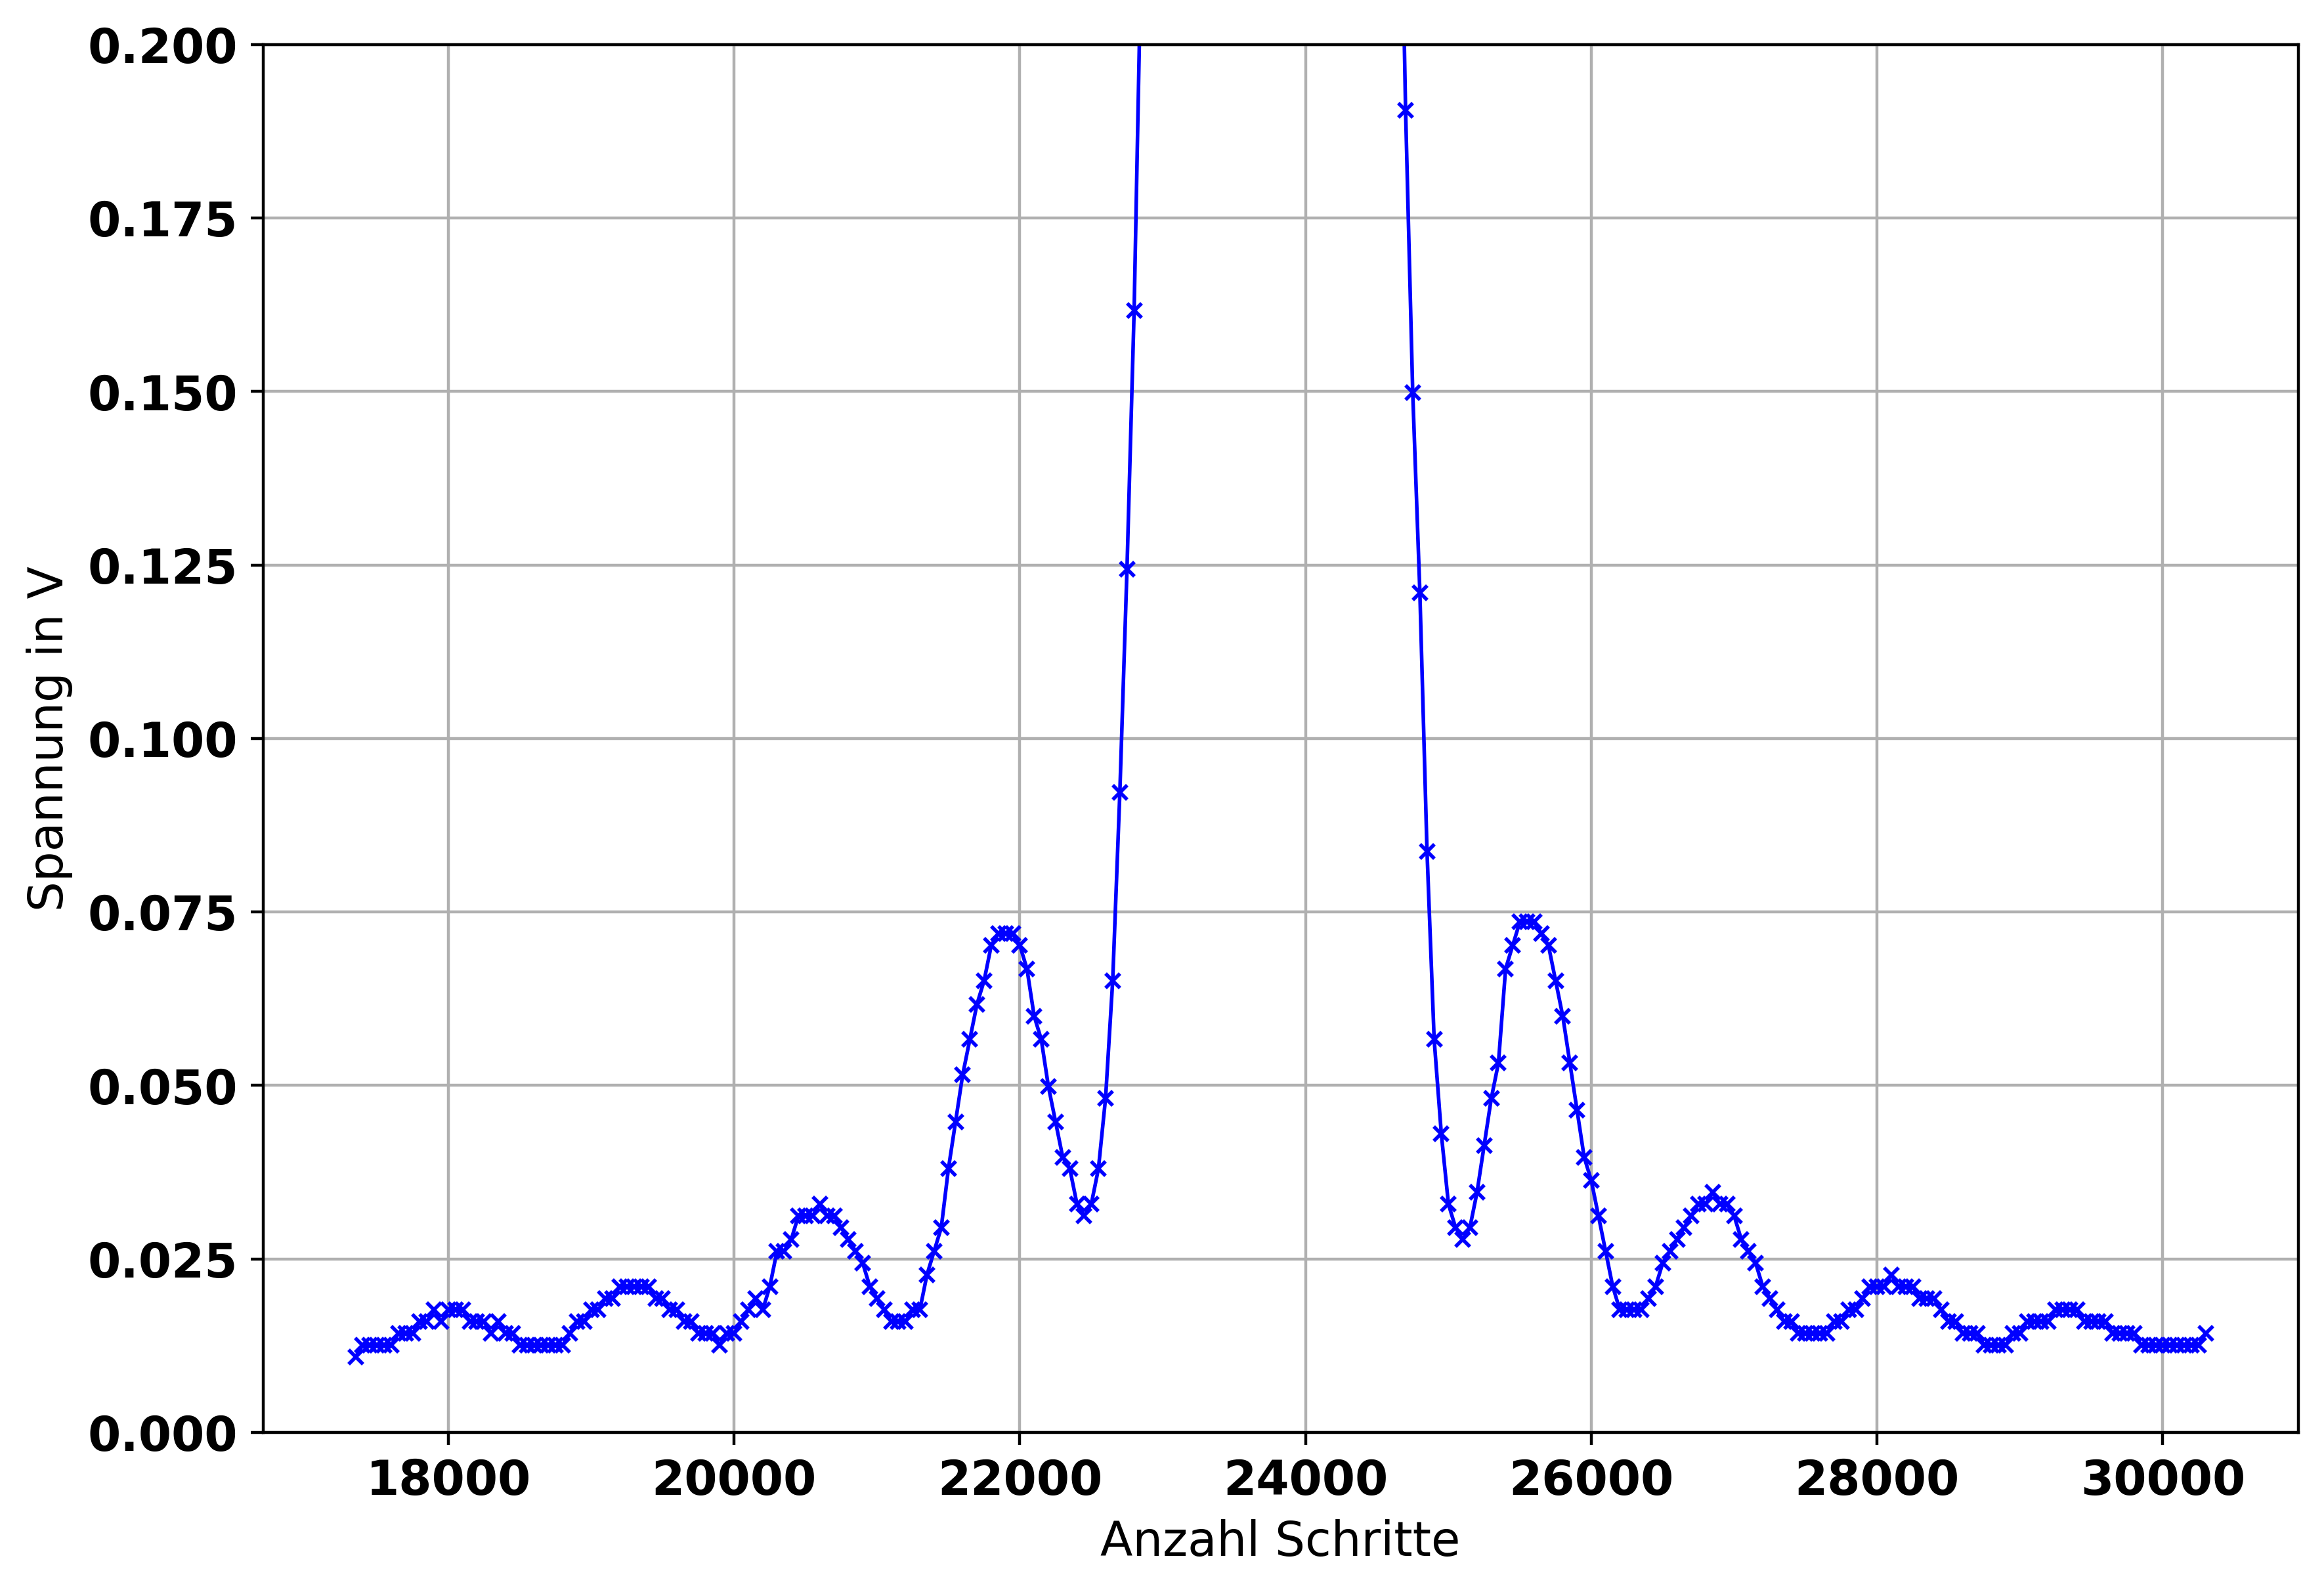

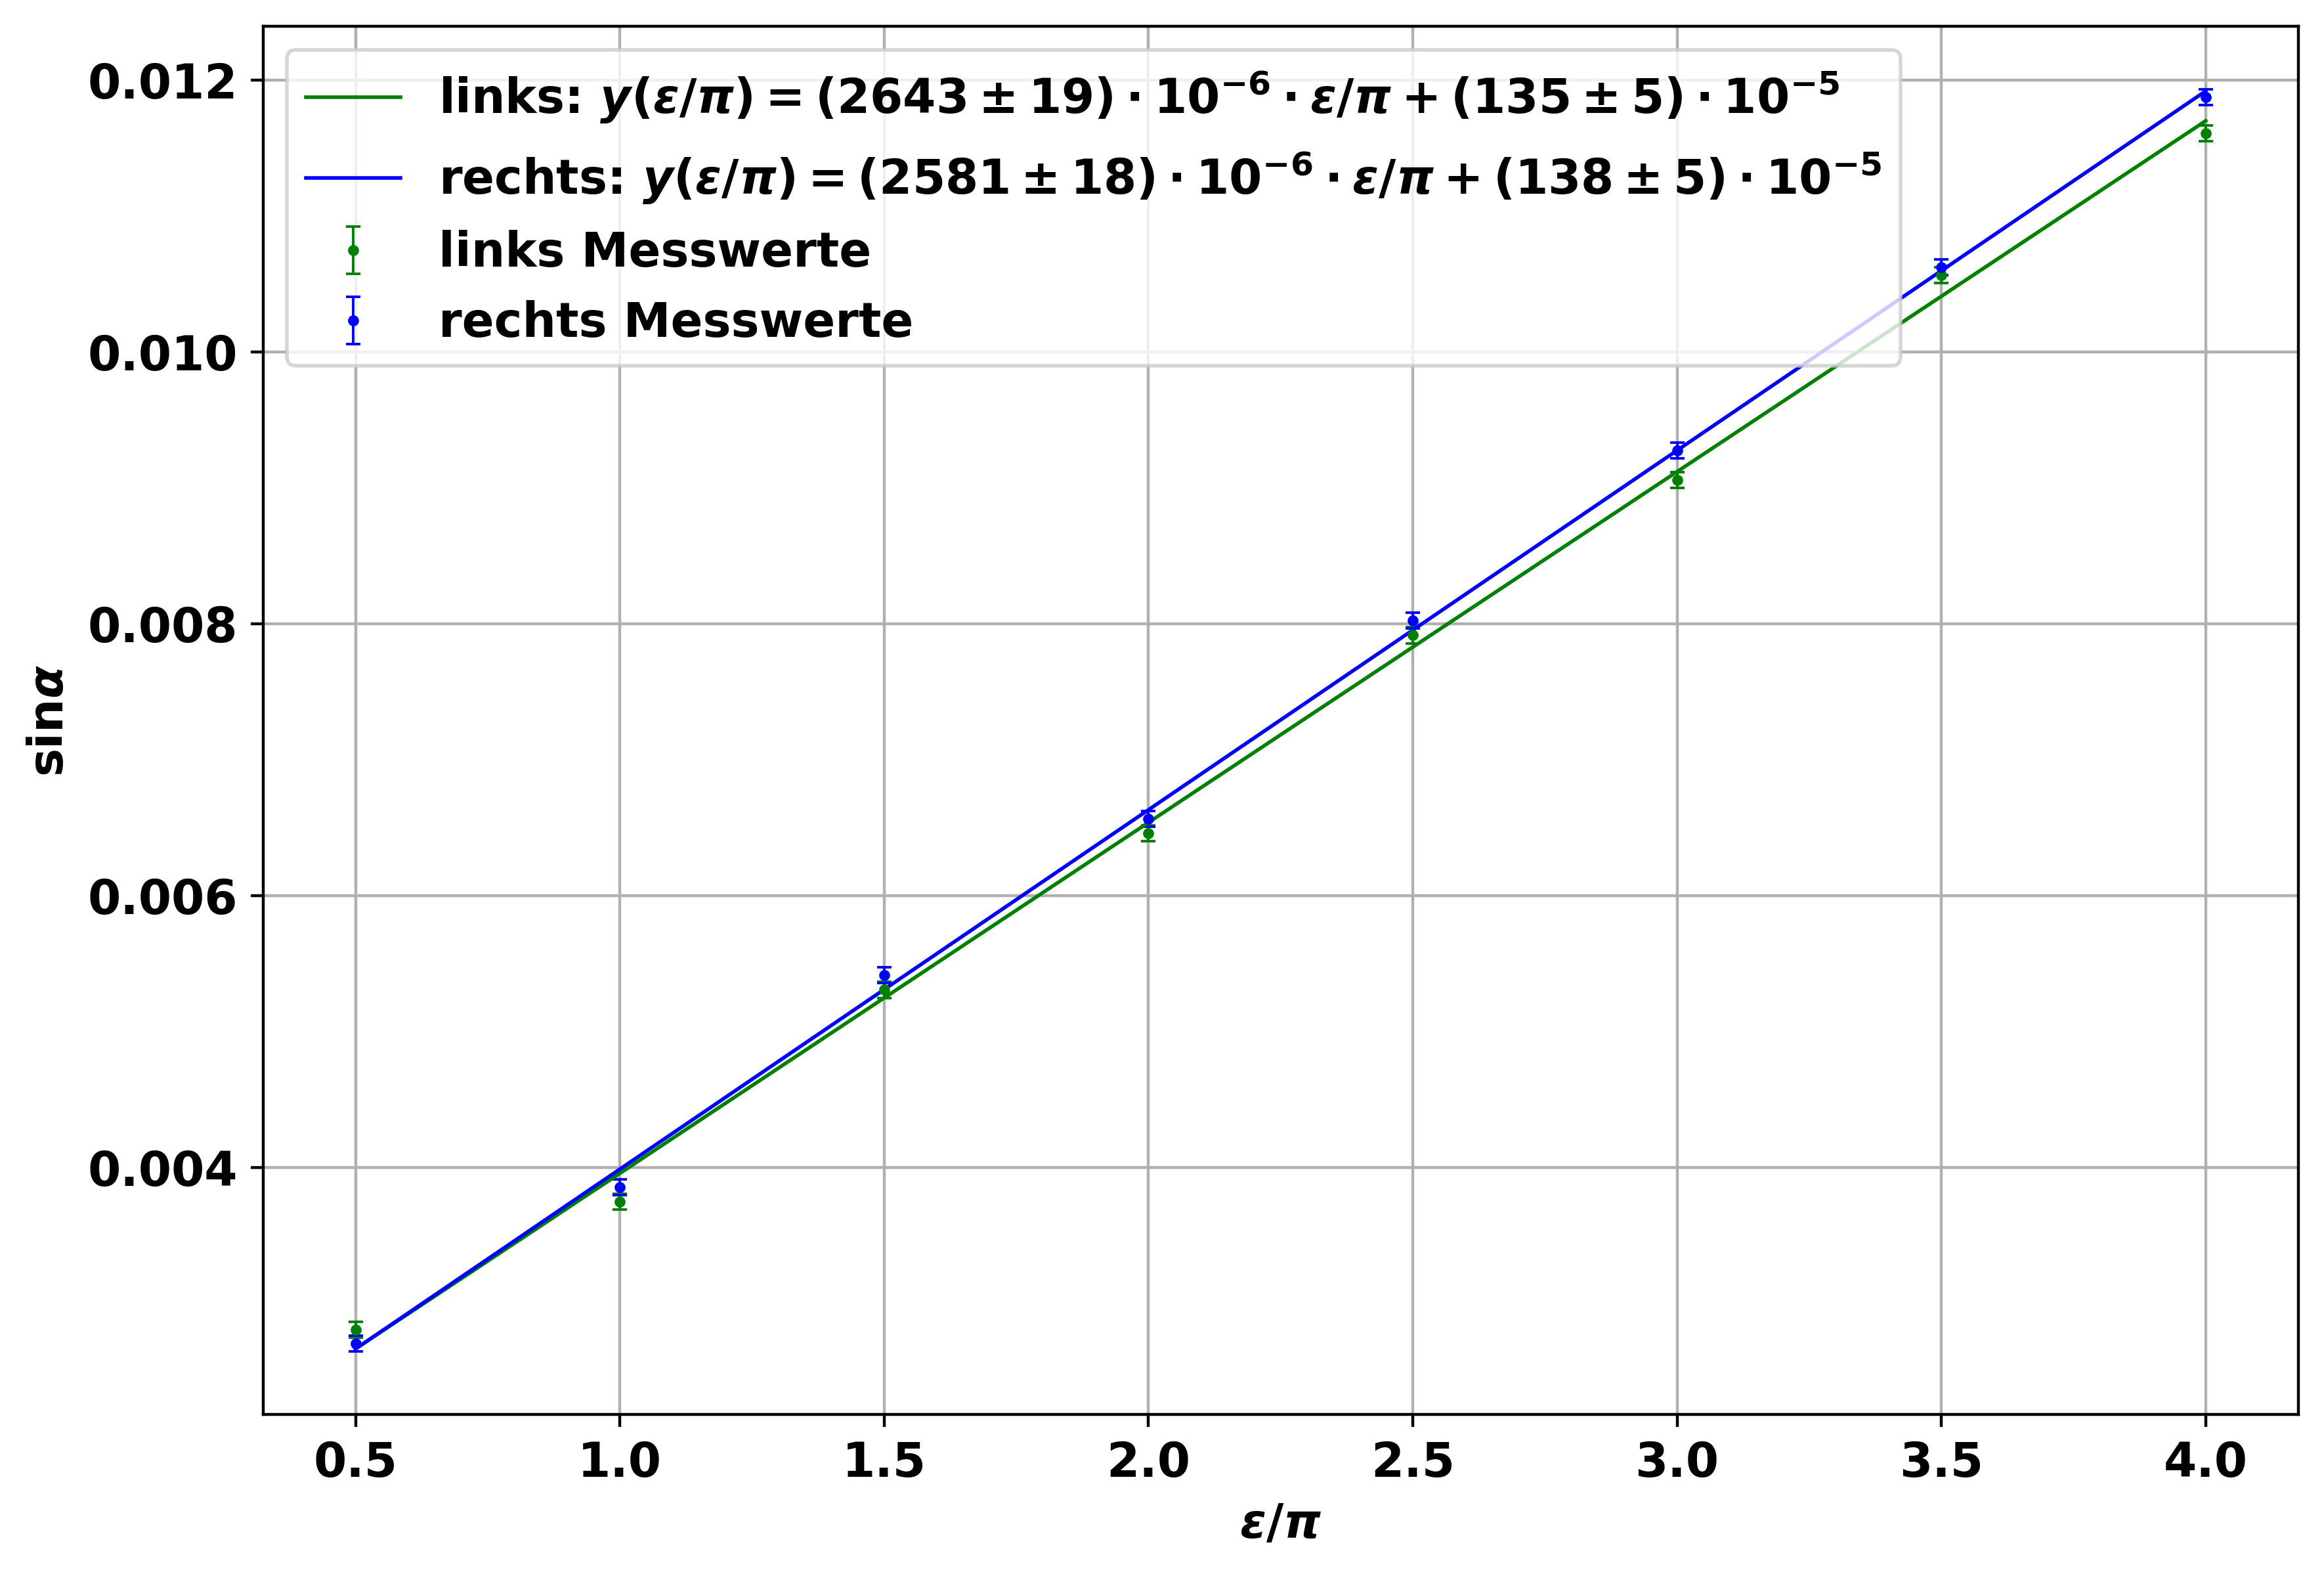

In [4]:
##spalt 

x= np.loadtxt("spalt.txt",usecols=0)
y = np.loadtxt("spalt.txt",usecols=1)/3





plt.figure(figsize=(10,7),dpi=400)
plt.grid()
plt.xlabel("Anzahl Schritte")
plt.ylabel("Spannung in V")
plt.plot(x,y,'bx-',lw=1,markersize=4)
plt.ylim([0,0.2])
plt.savefig("spalt1.pdf")



##Berechnung der relativen Positionen 
m = 59.38 ##pos des hauptmax
L = 1.2 ##abstand objekt schirm
dl = np.abs(np.array([56.13,54.75,52.88,51.5,49.75,48.25,46.63,45.13]) - m)*1e-3
dr = np.abs(np.array([62.75,63.88,65.75,67.13,68.88,70.25,72.06,73.31]) - m)*1e-3
derr = 0.07e-3
alphar = np.arctan(dr/L)
alphal = np.arctan(dl/L)
sinr = np.sin(alphar)
sinl = np.sin(alphal)
alpharerr = derr*L/(L**2+dr**2)
alphalerr = derr*L/(L**2+dl**2)
sinrerr = alpharerr*np.cos(alphar)
sinlerr = alphalerr*np.cos(alphal)
lam = 632.8e-9



eps = np.arange(0.5,4.5,0.5) ##epsilon/pi




def f(x,m,b): #Hier wird die Funktion beschrieben deren Verlauf genähert werden soll. Dabei ist wichtig, dass x an erster Stelle steht
	return  m*x+b

x_test = np.linspace(np.min(eps),np.max(eps),1000)

pr, pcovr = scipy.optimize.curve_fit(f, eps, sinr, sigma=sinrerr, p0=[0,0], absolute_sigma=True)
pl, pcovl = scipy.optimize.curve_fit(f, eps, sinl, sigma=sinlerr, p0=[0,0], absolute_sigma=True)

plt.figure(figsize=(10,7),dpi=400)
plt.grid()
plt.xlabel(r'$\epsilon/\pi$')
plt.ylabel(r'$ \sin\alpha $')
plt.errorbar(eps,sinr, yerr=sinrerr, marker='.',markersize=4, ls='', capsize=2, capthick=0.7, lw=0.7, label="links Messwerte",color = 'g')
plt.errorbar(eps,sinl, yerr=sinlerr, marker='.',markersize=4, ls='', capsize=2, capthick=0.7, lw=0.7, label="rechts Messwerte",color = 'b')
plt.plot(x_test,f(x_test,pr[0],pr[1]),lw = 1, label = r'links: $y(\epsilon/\pi)=(2643\pm19)\cdot 10^{-6}\cdot\epsilon/\pi+(135\pm5)\cdot 10^{-5}$',color = 'g')
plt.plot(x_test,f(x_test,pl[0],pl[1]),lw = 1, label = r'rechts: $y(\epsilon/\pi)=(2581\pm18)\cdot 10^{-6}\cdot\epsilon/\pi+(138\pm5)\cdot 10^{-5}$',color = 'b')
plt.legend(loc='upper left')
plt.savefig("spalt_eps.pdf")


##Korrelationskoeffizient
rl = scipy.stats.pearsonr(eps,sinl)
rr = scipy.stats.pearsonr(eps,sinr)


##charakteristische Größe
mr = pr[0]
ml = pl[0]
mrerr = np.sqrt(pcovr[0][0])
mlerr = np.sqrt(pcovl[0][0])
Dl = lam/ml
Dr = lam/mr
Drerr = mrerr*lam/mr**2
Dlerr = mlerr*lam/ml**2

print(rl,rr)

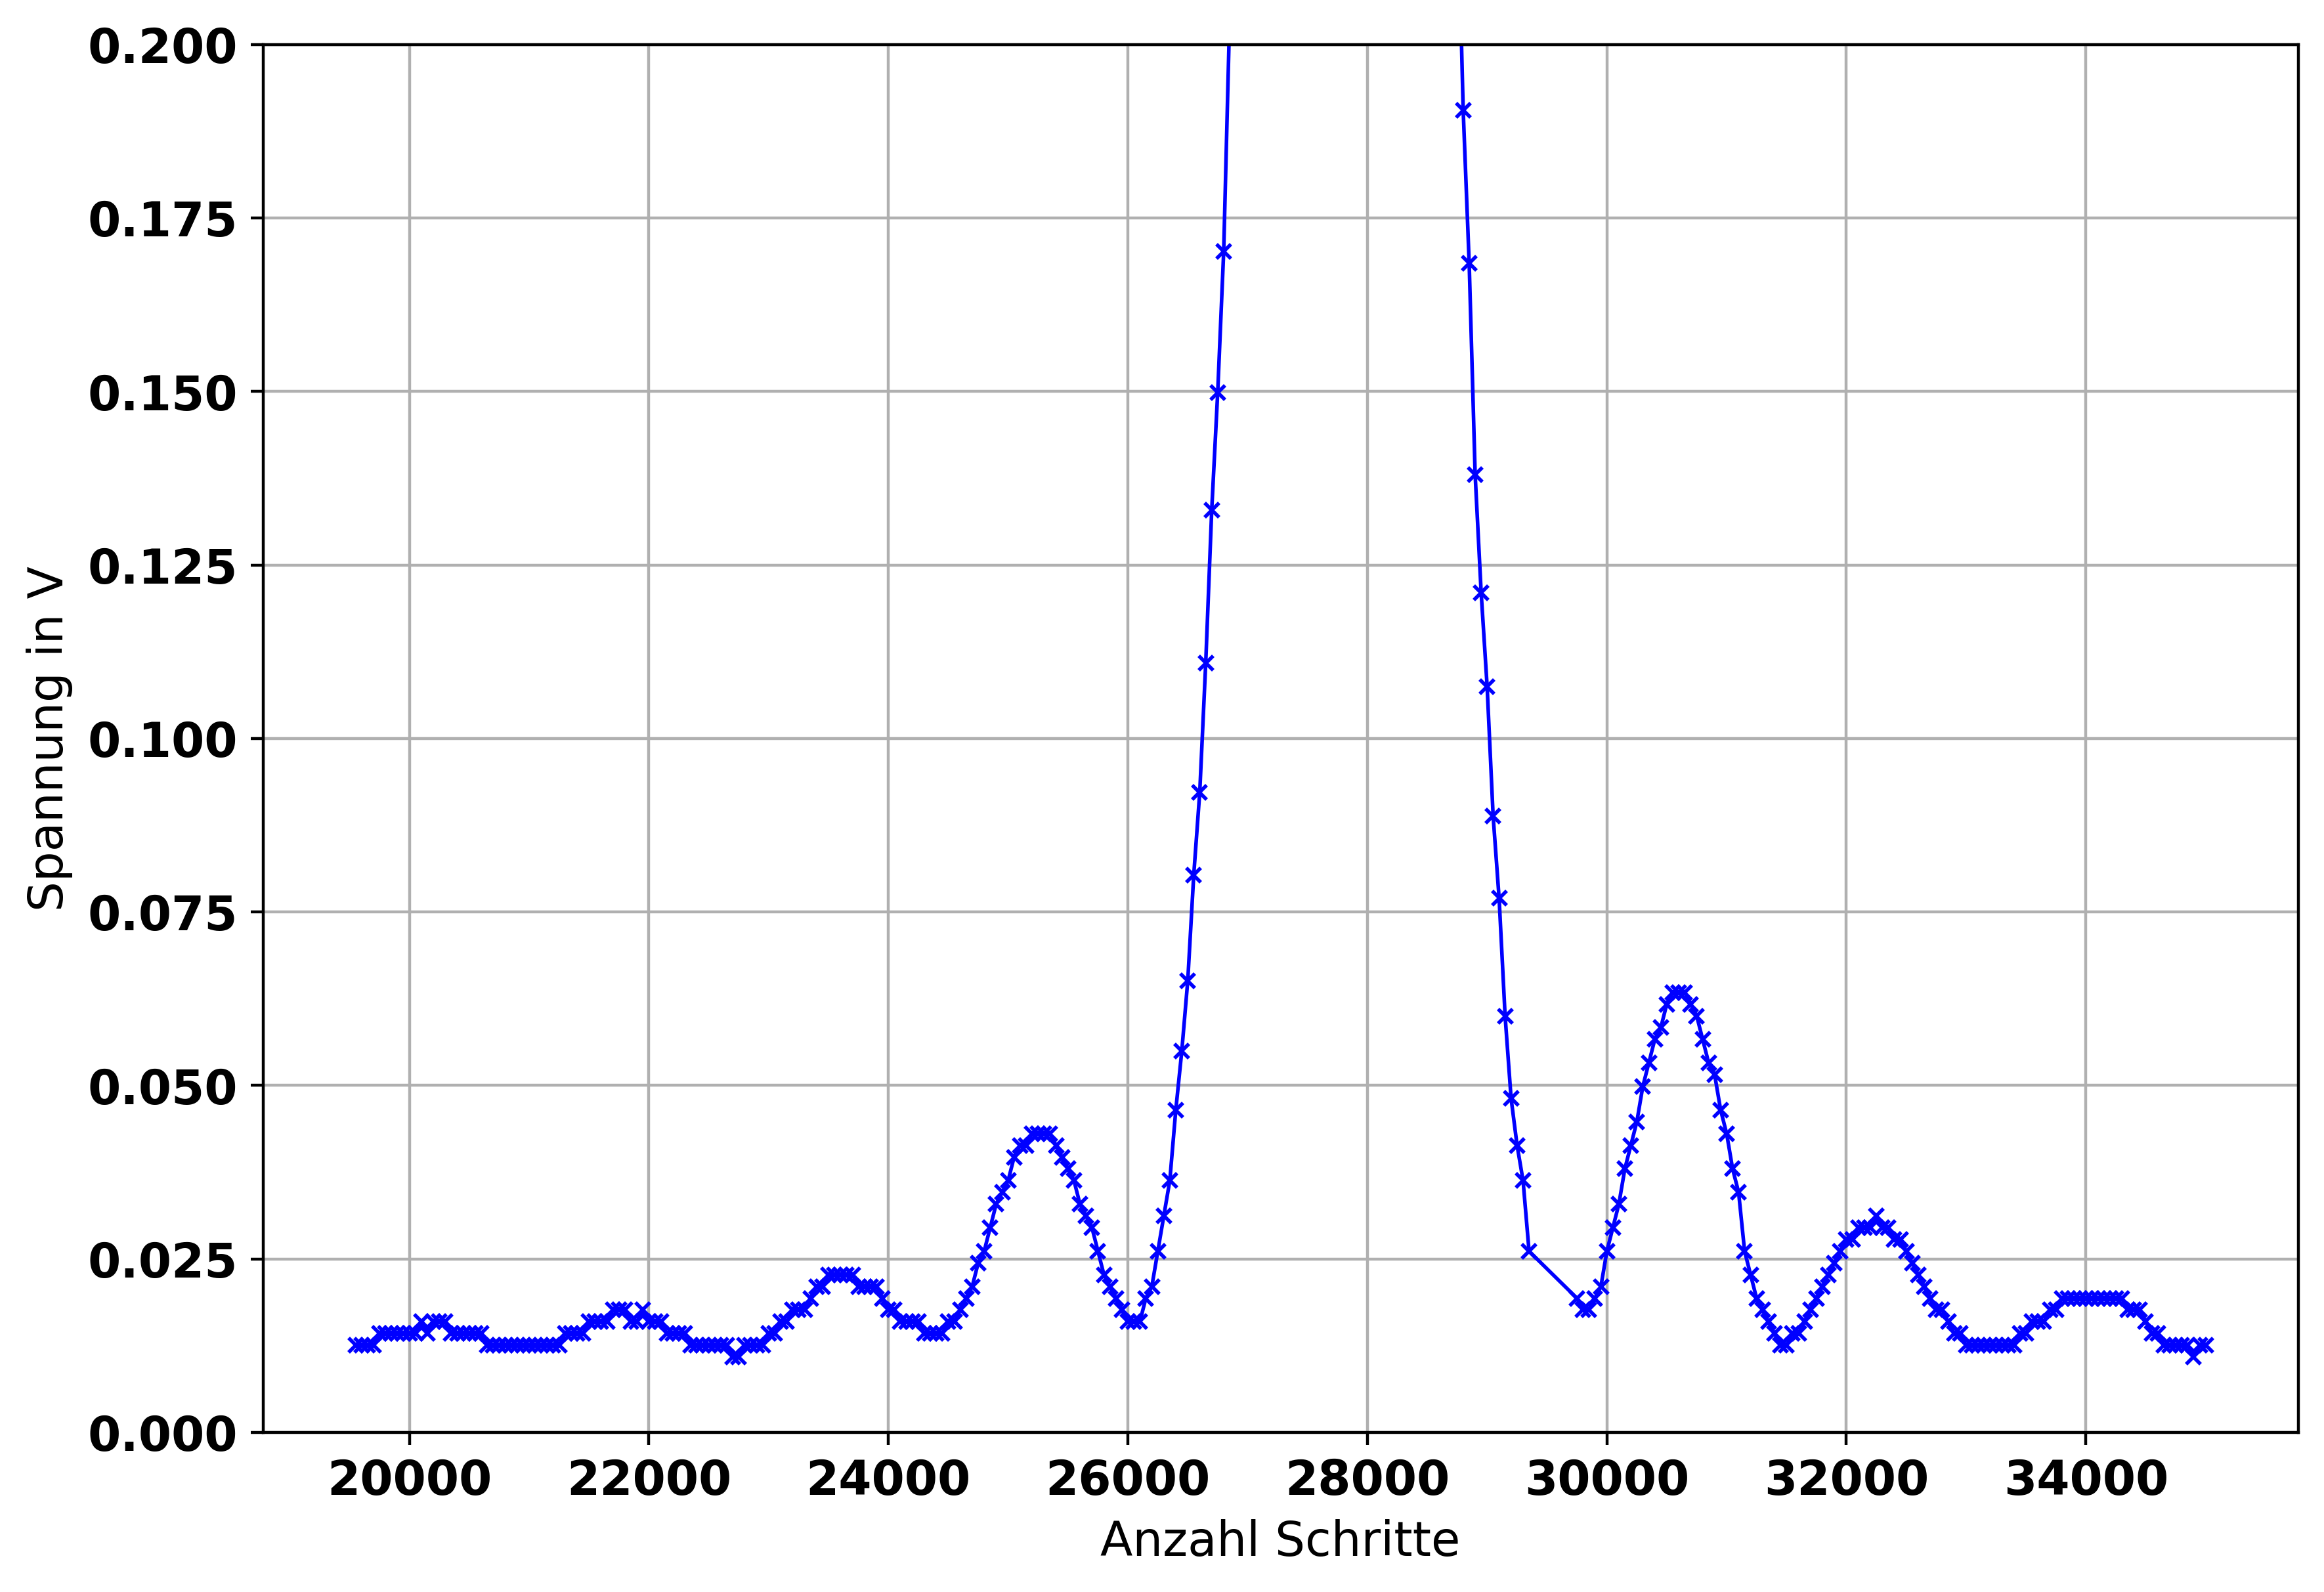

In [5]:
#####steg 
import numpy as np
import matplotlib.pyplot as plt
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 13}

plt.rc('font', **font)

x= np.loadtxt("steg.txt",usecols=0)
y = np.loadtxt("steg.txt",usecols=1)/3





plt.figure(figsize=(10,7),dpi=400)
plt.grid()
plt.xlabel("Anzahl Schritte")
plt.ylabel("Spannung in V")
plt.plot(x,y,'bx-',lw=1,markersize=4)
plt.ylim([0,0.2])
plt.savefig("steg1.pdf")



[0.00374997 0.00541659 0.00724148 0.00885799 0.0108327  0.01260733]


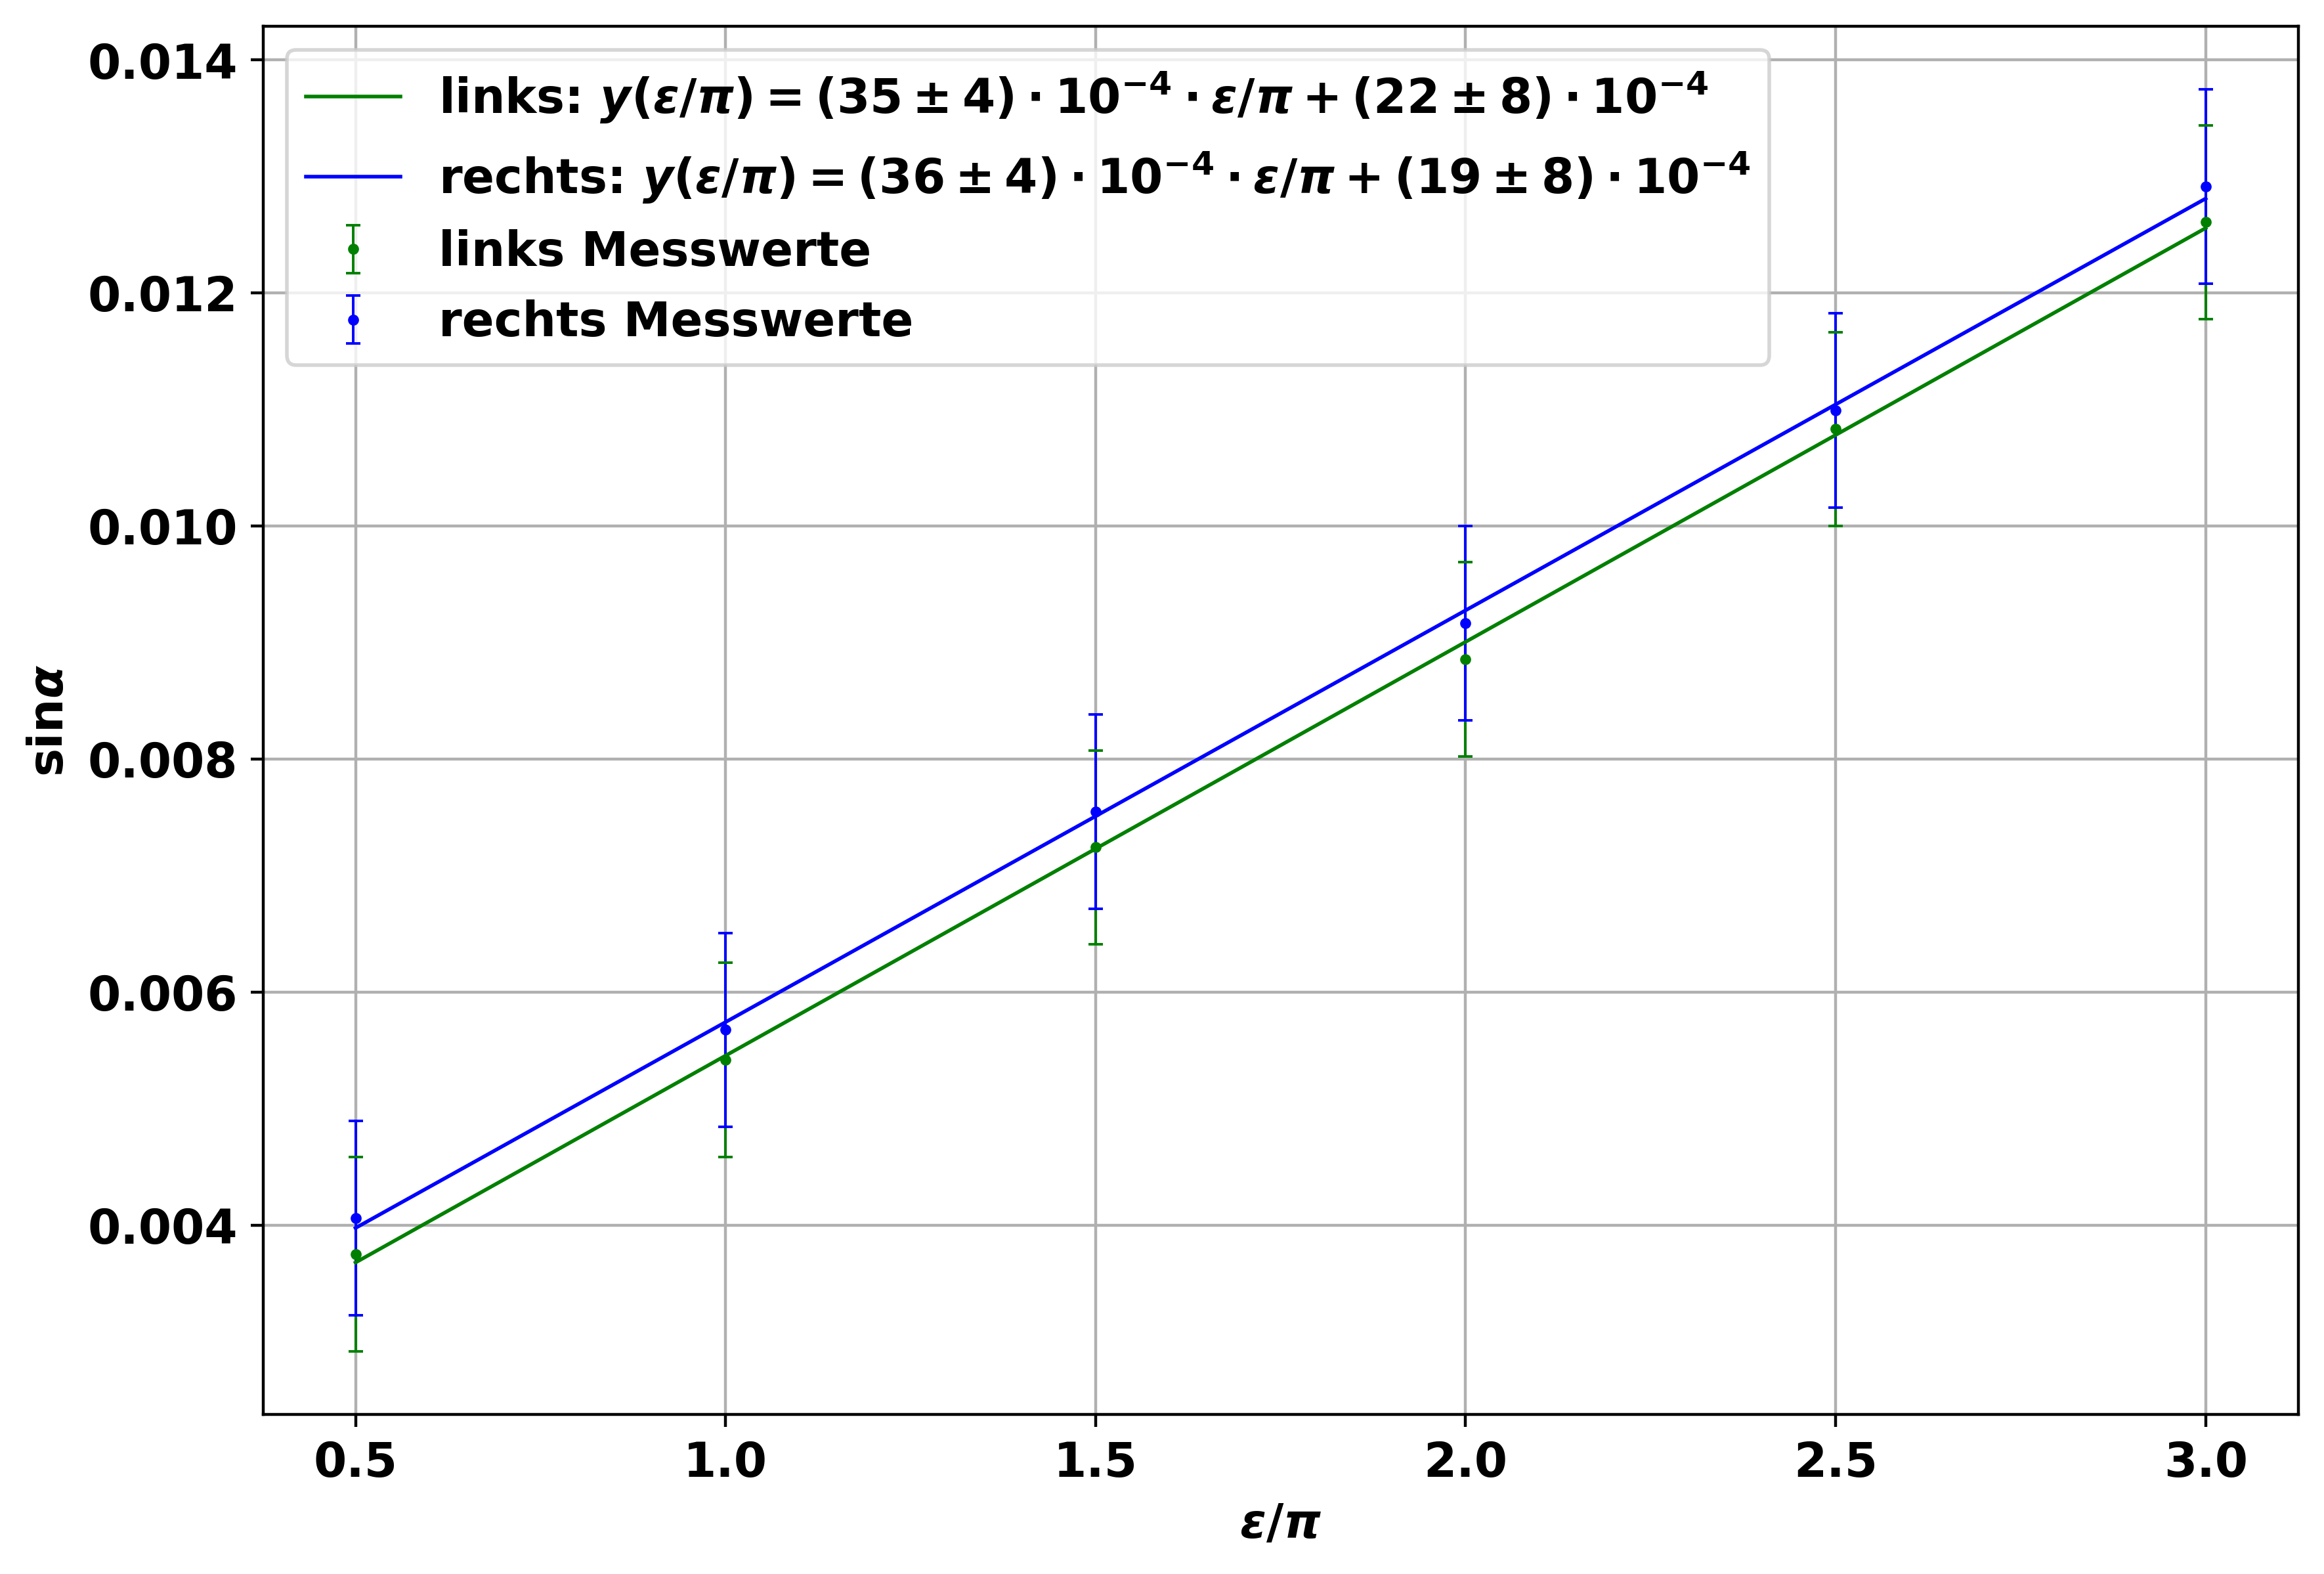

In [6]:
import scipy.optimize
import scipy.stats

##Berechnung der relativen Positionen 
m = 70 ##pos des hauptmax
L = 1.2 ##abstand objekt schirm
dl = np.abs(np.array([65.13,63.19,60.94,59,56.81,54.5]) - m)*1e-3
dr = np.abs(np.array([74.50,76.50,78.69,80.63,83,85.13]) - m)*1e-3
derr = 1e-3
alphar = np.arctan(dr/L)
alphal = np.arctan(dl/L)
sinr = np.sin(alphar)
sinl = np.sin(alphal)
alpharerr = derr*L/(L**2+dr**2)
alphalerr = derr*L/(L**2+dl**2)
sinrerr = alpharerr*np.cos(alphar)
sinlerr = alphalerr*np.cos(alphal)
lam = 632.8e-9


eps = np.arange(0.5,3.5,0.5) ##epsilon/pi




def f(x,m,b): #Hier wird die Funktion beschrieben deren Verlauf genähert werden soll. Dabei ist wichtig, dass x an erster Stelle steht
	return  m*x+b

x_test = np.linspace(np.min(eps),np.max(eps),1000)

pr, pcovr = scipy.optimize.curve_fit(f, eps, sinr, sigma=sinrerr, p0=[0,0], absolute_sigma=True)
pl, pcovl = scipy.optimize.curve_fit(f, eps, sinl, sigma=sinlerr, p0=[0,0], absolute_sigma=True)

plt.figure(figsize=(10,7),dpi=400)
plt.grid()
plt.xlabel(r'$\epsilon/\pi$')
plt.ylabel(r'$ \sin\alpha $')
plt.errorbar(eps,sinr, yerr=sinrerr, marker='.',markersize=4, ls='', capsize=2, capthick=0.7, lw=0.7, label="links Messwerte",color = 'g')
plt.errorbar(eps,sinl, yerr=sinlerr, marker='.',markersize=4, ls='', capsize=2, capthick=0.7, lw=0.7, label="rechts Messwerte",color = 'b')
plt.plot(x_test,f(x_test,pr[0],pr[1]),lw = 1, label = r'links: $y(\epsilon/\pi)=(35\pm4)\cdot 10^{-4}\cdot\epsilon/\pi+(22\pm8)\cdot 10^{-4}$',color = 'g')
plt.plot(x_test,f(x_test,pl[0],pl[1]),lw = 1, label = r'rechts: $y(\epsilon/\pi)=(36\pm4)\cdot 10^{-4}\cdot\epsilon/\pi+(19\pm8)\cdot 10^{-4}$',color = 'b')
plt.legend(loc='upper left')
plt.savefig("steg_eps.pdf")

print(sinr)


In [7]:
##Korrelationskoeffizient
rl = np.corrcoef(eps,sinl)
rr = np.corrcoef(eps,sinr)


##charakteristische Größe
mr = pr[0]
ml = pl[0]
mrerr = np.sqrt(pcovr[0][0])
mlerr = np.sqrt(pcovl[0][0])
Dl = lam/ml
Dr = lam/mr
Drerr = mrerr*lam/mr**2
Dlerr = mlerr*lam/ml**2

print(rl)
print(rr)

[[1.         0.99964344]
 [0.99964344 1.        ]]
[[1.        0.9996955]
 [0.9996955 1.       ]]


(0.0, 0.075)

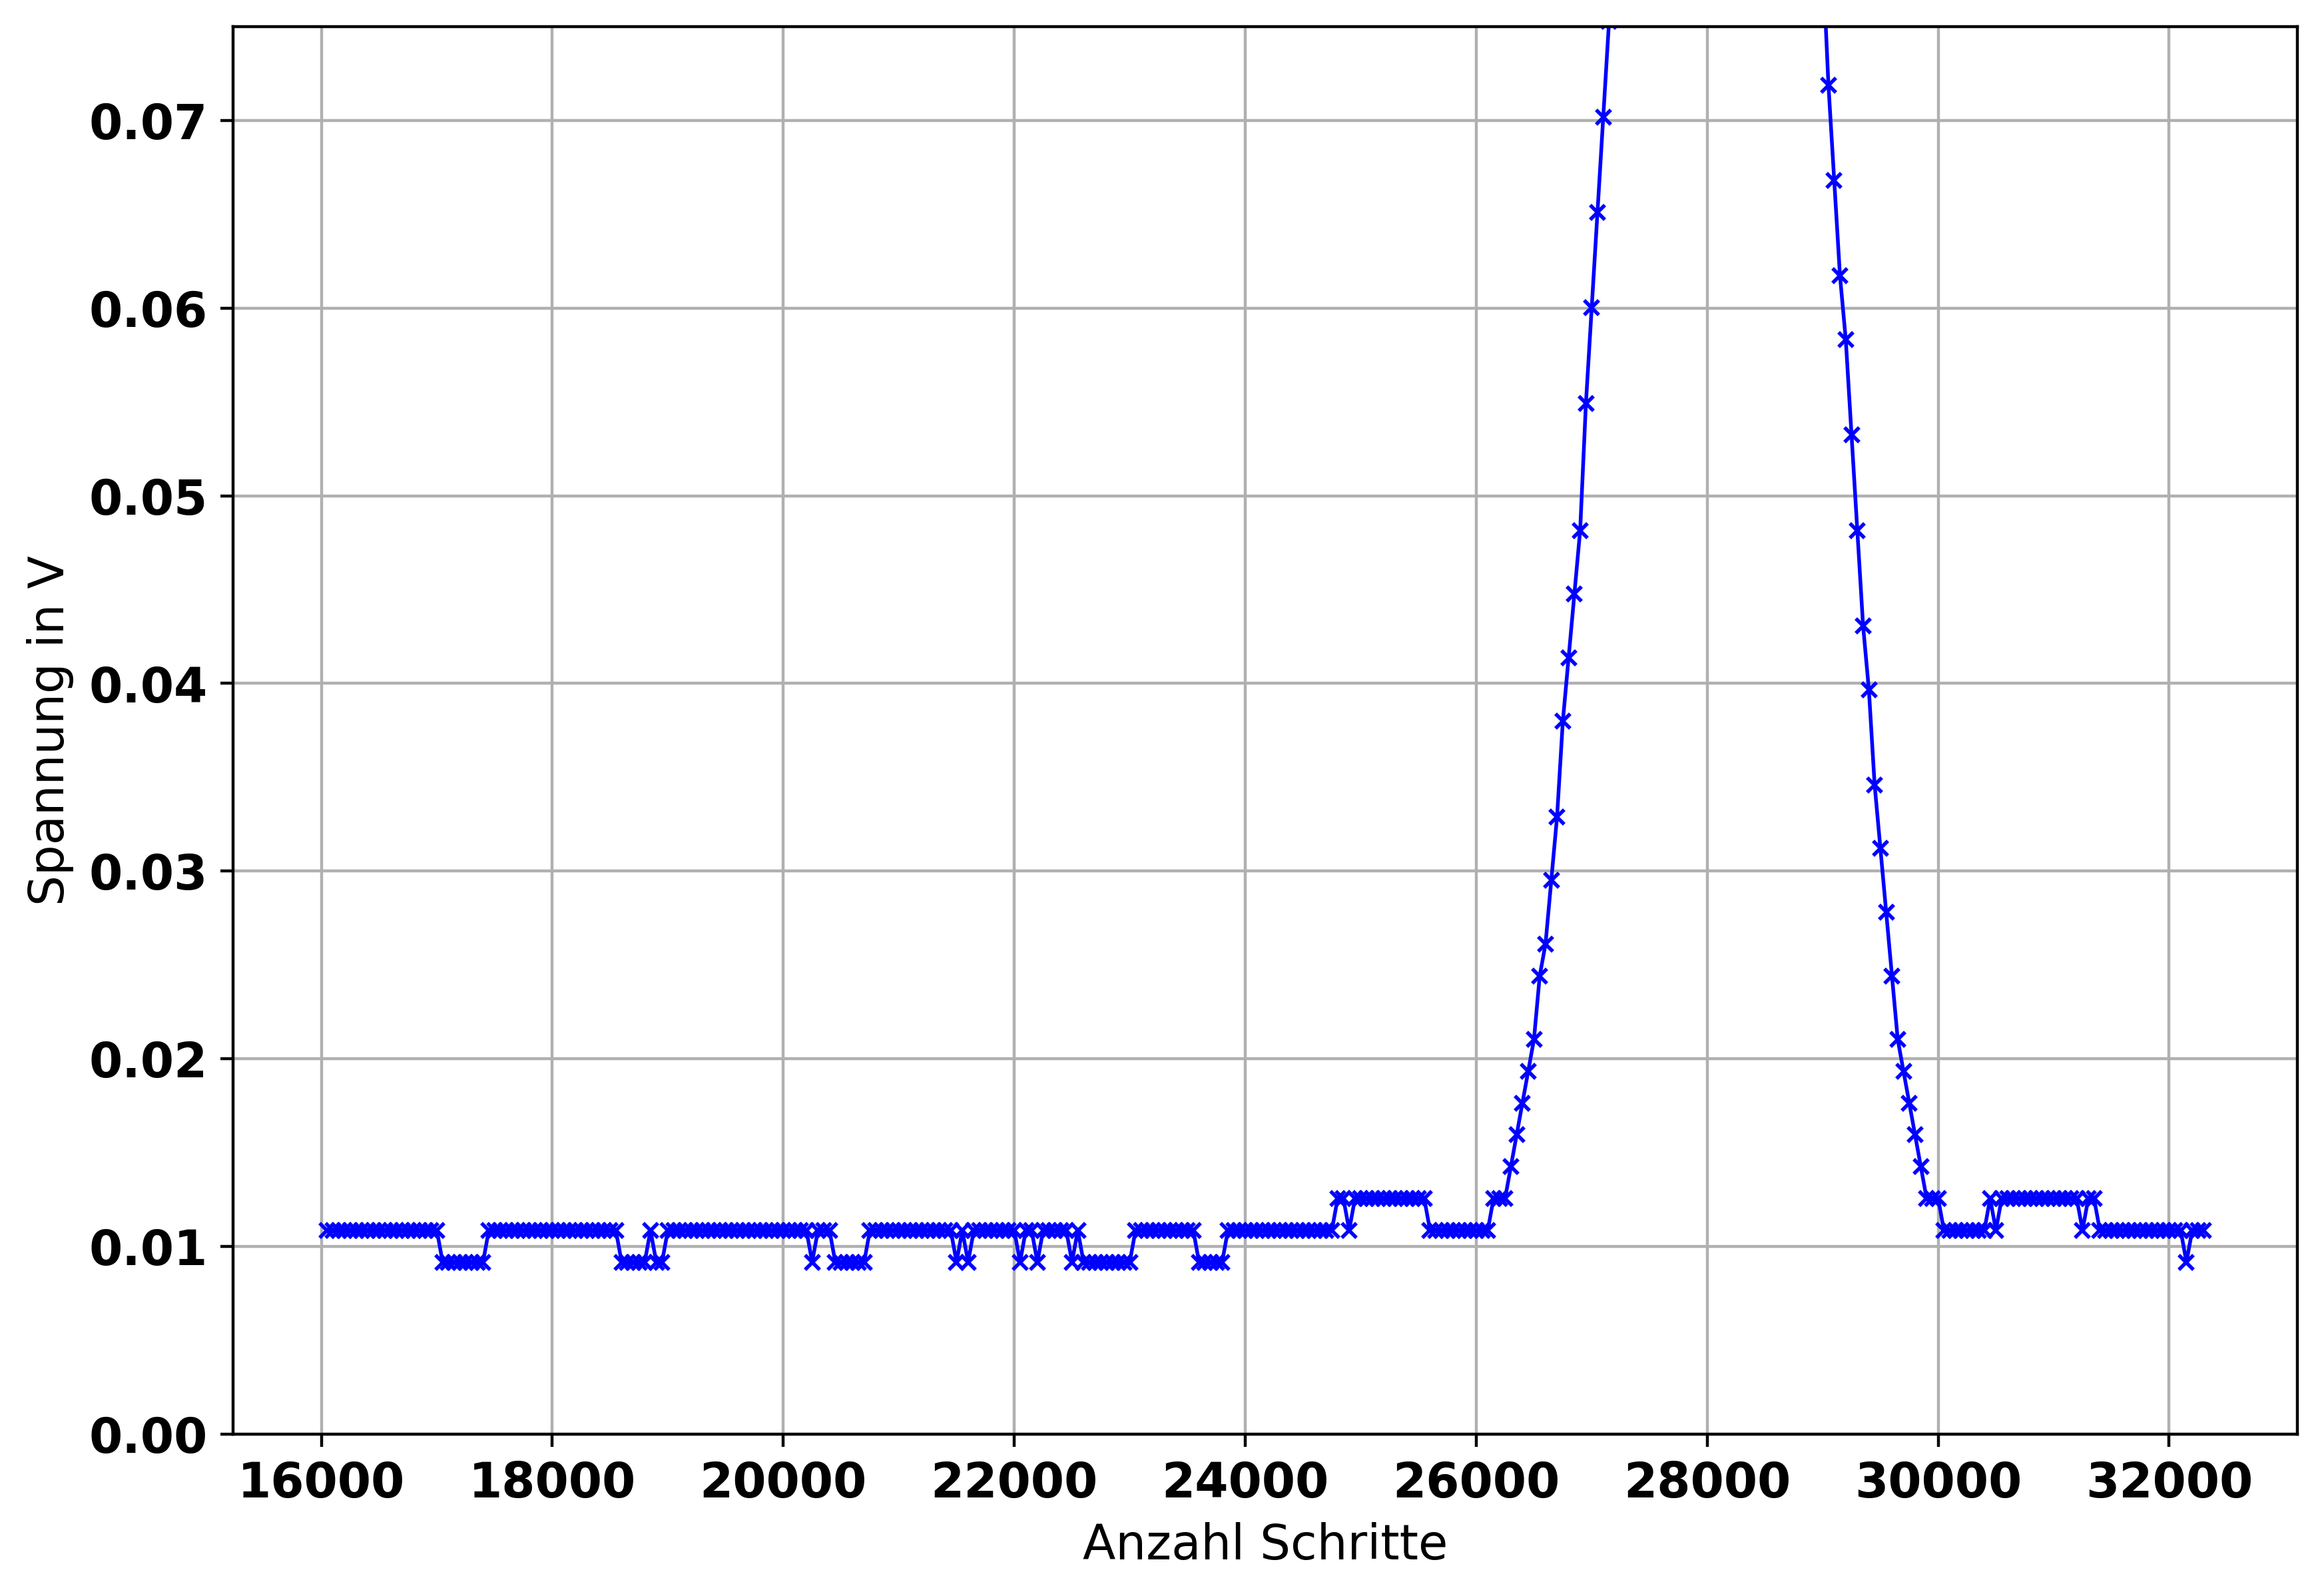

In [8]:
##Kreisblende


x= np.loadtxt("kreis.txt",usecols=0)
y = np.loadtxt("kreis.txt",usecols=1)/3





plt.figure(figsize=(10,7),dpi=400)
plt.grid()
plt.xlabel("Anzahl Schritte")
plt.ylabel("Spannung in V")
plt.plot(x,y,'bx-',lw=1,markersize=4)
plt.ylim([0,0.075])

